#### Importing the necessary libraries and the data file

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important;}</style>"))

In [2]:
bank = pd.read_csv('bank.csv',sep = ';')

In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [4]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
bank2 = bank.copy()

In [6]:
#Let's do the mapping for yes responses to 1's and nos to 0's
bank2.y = bank2.y.map({'yes':1,'no':0})

In [7]:
bank2.y.value_counts(normalize=True)

0    0.887346
1    0.112654
Name: y, dtype: float64

### Train-test split 

In [8]:
from sklearn.model_selection import train_test_split

In [34]:
df_train, df_test = train_test_split(bank2, random_state=42)

In [10]:
df_train.shape, df_test.shape

((30891, 21), (10297, 21))

## Working with the numerical variables

In [11]:
df_train.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,30891.000000,30891.000000,30891.000000,30891.000000,30891.000000,30891.000000,30891.000000,30891.000000,30891.000000,30891.000000,30891.000000
mean,40.017287,257.551746,2.568839,963.029361,0.172348,0.083264,93.577223,-40.506782,3.622596,5167.037687,0.112881
std,10.448075,259.371218,2.747802,185.544213,0.492298,1.570746,0.579333,4.629842,1.734393,72.461175,0.316452
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.000000,179.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,318.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.000000,4918.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


`duration` feature

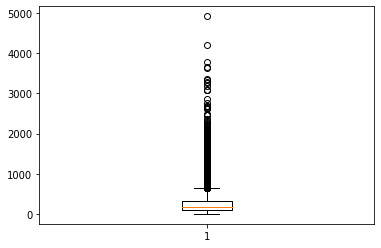

In [12]:
plt.boxplot(df_train.duration)
plt.show()

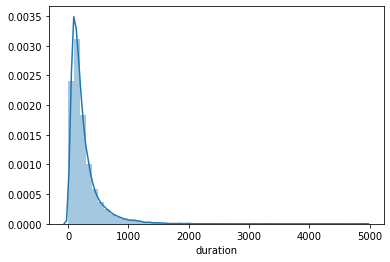

In [13]:
sns.distplot(df_train.duration)
plt.show()

#### Applying a log transformation 

In [35]:
df_train['dur_log'] = np.log1p(df_train.duration)

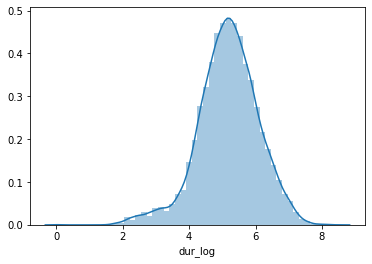

In [36]:
sns.distplot(df_train.dur_log)
plt.show()

### Applying PowerTransform 

In [16]:
from sklearn.preprocessing import PowerTransformer

In [17]:
pt = PowerTransformer()

In [18]:
df_train['dur_trans'] = pt.fit_transform(df_train[['duration']])

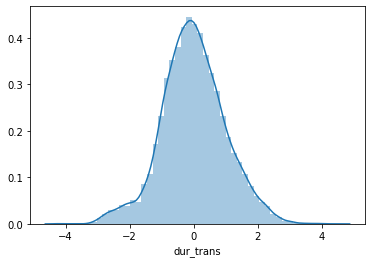

In [19]:
sns.distplot(df_train.dur_trans)
plt.show()

### Feature scaling

In [23]:
df_train[['age', 'dur_log']].describe()

,age,dur_log
count,30891.000000,30891.000000
mean,40.017287,5.170355
std,10.448075,0.916576
min,17.000000,0.000000
25%,32.000000,4.634729
50%,38.000000,5.192957
75%,47.000000,5.765191
max,98.000000,8.500861


In [24]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler()

In [39]:
df_train[['dur_log']] = scaler.fit_transform(df_train[['dur_log']])

In [40]:
df_train[['dur_log']].describe()

,dur_log
count,30891.000000
mean,0.608215
std,0.107822
min,0.000000
25%,0.545207
50%,0.610874
75%,0.678189
max,1.000000


#### `age` variable

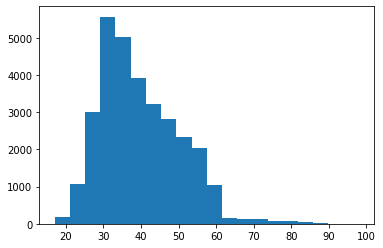

In [41]:
plt.hist(df_train.age, bins=20)
plt.show()

Create bins -   
 - < 25, 25-50, 50-75, >75

In [42]:
bin_manual = [0, 25, 50, 75, 100]
labs = ['<25', '25-50','50-75','above 75']

In [43]:
?pd.cut

In [45]:
df_train['age_bin'] = pd.cut(df_train.age, bins=bin_manual, labels=labs)

In [47]:
df_train[['age_bin','age']].head()

,age_bin,age
549,25-50,50
1974,25-50,26
20992,25-50,34
1730,25-50,30
26913,25-50,29


In [48]:
df_train.groupby('age_bin')['age'].agg(['max','min'])

,max,min
age_bin,,
<25,25,17
25-50,50,26
50-75,75,51
above 75,98,76


#### Quantile based binning

In [49]:
labs = ['VL','L','M','H','VH']
quantiles = [0, 0.2, 0.4, 0.6, 0.8, 1]

In [51]:
df_train['age_bin'] = pd.qcut(df_train.age, quantiles, labs)

In [52]:
df_train.groupby('age_bin')['age'].agg(['min', 'max'])

,min,max
age_bin,,
VL,17,31
L,32,35
M,36,41
H,42,49
VH,50,98


In [53]:
df_train.age_bin.value_counts(normalize=True)

VL    0.227445
M     0.206597
VH    0.196336
H     0.195202
L     0.174420
Name: age_bin, dtype: float64

## Categorical features

#### Dummy encoding

In [54]:
df_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,dur_log,age_bin
549,50,blue-collar,married,basic.4y,unknown,unknown,unknown,telephone,may,tue,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.592523,VH
1974,26,blue-collar,single,high.school,no,no,no,telephone,may,fri,...,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0,0.631227,VL
20992,34,technician,married,high.school,no,yes,no,cellular,aug,thu,...,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,0,0.523988,L
1730,30,blue-collar,single,basic.9y,no,yes,no,telephone,may,fri,...,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0,0.679655,VL
26913,29,admin.,single,university.degree,no,yes,no,cellular,nov,thu,...,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,0,0.686379,VL


In [55]:
df_train.marital.value_counts(normalize=True)

married     0.602732
single      0.283189
divorced    0.112266
unknown     0.001813
Name: marital, dtype: float64

In [56]:
pd.get_dummies(df_train.marital, prefix='Mari', drop_first=True)

,Mari_married,Mari_single,Mari_unknown
549,1,0,0
1974,0,1,0
20992,1,0,0
1730,0,1,0
26913,0,1,0
...,...,...,...
6265,1,0,0
11284,1,0,0
38158,1,0,0
860,1,0,0


In [57]:
pd.get_dummies(df_train, columns= ['marital'], prefix=['Mari'], drop_first=True)

,age,job,education,default,housing,loan,contact,month,day_of_week,duration,...,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,dur_log,age_bin,Mari_married,Mari_single,Mari_unknown
549,50,blue-collar,basic.4y,unknown,unknown,unknown,telephone,may,tue,153,...,93.994,-36.4,4.857,5191.0,0,0.592523,VH,1,0,0
1974,26,blue-collar,high.school,no,no,no,telephone,may,fri,213,...,93.994,-36.4,4.855,5191.0,0,0.631227,VL,0,1,0
20992,34,technician,high.school,no,yes,no,cellular,aug,thu,85,...,93.444,-36.1,4.964,5228.1,0,0.523988,L,1,0,0
1730,30,blue-collar,basic.9y,no,yes,no,telephone,may,fri,322,...,93.994,-36.4,4.855,5191.0,0,0.679655,VL,0,1,0
26913,29,admin.,university.degree,no,yes,no,cellular,nov,thu,341,...,93.200,-42.0,4.076,5195.8,0,0.686379,VL,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,58,retired,professional.course,unknown,no,no,telephone,may,tue,427,...,93.994,-36.4,4.857,5191.0,0,0.712766,VH,1,0,0
11284,37,management,university.degree,no,no,no,telephone,jun,thu,288,...,94.465,-41.8,4.961,5228.1,0,0.666571,M,1,0,0
38158,35,admin.,high.school,no,yes,no,cellular,oct,thu,194,...,92.431,-26.9,0.754,5017.5,1,0.620290,L,1,0,0
860,40,management,university.degree,no,yes,no,telephone,may,wed,295,...,93.994,-36.4,4.856,5191.0,0,0.669386,M,1,0,0


#### Job column

In [58]:
pd.get_dummies(df_train.job, prefix='job', drop_first=True)

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
549,1,0,0,0,0,0,0,0,0,0,0
1974,1,0,0,0,0,0,0,0,0,0,0
20992,0,0,0,0,0,0,0,0,1,0,0
1730,1,0,0,0,0,0,0,0,0,0,0
26913,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6265,0,0,0,0,1,0,0,0,0,0,0
11284,0,0,0,1,0,0,0,0,0,0,0
38158,0,0,0,0,0,0,0,0,0,0,0
860,0,0,0,1,0,0,0,0,0,0,0


### Label encoding

In [60]:
from sklearn.preprocessing import LabelEncoder

In [62]:
lencoder = LabelEncoder()

In [61]:
?LabelEncoder

In [63]:
df_train['job_le'] = lencoder.fit_transform(df_train.job)

In [64]:
df_train.groupby('job')['job_le'].agg(['min', 'max'])

,min,max
job,,
admin.,0,0
blue-collar,1,1
entrepreneur,2,2
housemaid,3,3
management,4,4
retired,5,5
self-employed,6,6
services,7,7
student,8,8


### Mean encoding

In [66]:
map_mean = df_train.groupby('job')['y'].mean()
map_mean

job
admin.           0.131931
blue-collar      0.069964
entrepreneur     0.082791
housemaid        0.088308
management       0.109829
retired          0.245106
self-employed    0.099166
services         0.083832
student          0.307806
technician       0.110643
unemployed       0.144966
unknown          0.100000
Name: y, dtype: float64

In [67]:
df_train['job_mean_encode'] = df_train.job.map(map_mean)

In [68]:
df_train.groupby('job')['job_mean_encode'].agg(['min', 'max'])

,min,max
job,,
admin.,0.131931,0.131931
blue-collar,0.069964,0.069964
entrepreneur,0.082791,0.082791
housemaid,0.088308,0.088308
management,0.109829,0.109829
retired,0.245106,0.245106
self-employed,0.099166,0.099166
services,0.083832,0.083832
student,0.307806,0.307806


### Clubbing categories

#### Top N based on frequency

In [69]:
df_train.job.value_counts(normalize=True)

admin.           0.253957
blue-collar      0.225794
technician       0.161503
services         0.097310
management       0.070150
retired          0.041339
self-employed    0.034929
entrepreneur     0.034800
housemaid        0.026027
unemployed       0.024117
student          0.021981
unknown          0.008093
Name: job, dtype: float64

In [71]:
job_freqs = df_train.job.value_counts(normalize=True)

In [72]:
job_freqs.cumsum()

admin.           0.253957
blue-collar      0.479751
technician       0.641255
services         0.738565
management       0.808715
retired          0.850053
self-employed    0.884983
entrepreneur     0.919782
housemaid        0.945809
unemployed       0.969927
student          0.991907
unknown          1.000000
Name: job, dtype: float64

In [76]:
top_jobs = job_freqs.cumsum()[:4].index
top_jobs

Index(['admin.', 'blue-collar', 'technician', 'services'], dtype='object')

In [77]:
df_train['job_mod_topn'] = np.where(df_train.job.isin(top_jobs), df_train.job, 'OTH')

In [78]:
df_train.groupby(['job_mod_topn','job']).size()

job_mod_topn  job          
OTH           entrepreneur     1075
              housemaid         804
              management       2167
              retired          1277
              self-employed    1079
              student           679
              unemployed        745
              unknown           250
admin.        admin.           7845
blue-collar   blue-collar      6975
services      services         3006
technician    technician       4989
dtype: int64

### Clubbing categories - based on Target

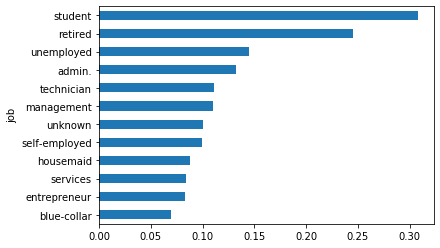

In [80]:
df_train.groupby('job')['y'].mean().sort_values().plot.barh()
plt.show()

In [81]:
def club_on_y(val):
    if val in ['student','retired']:
        return 'a_high'
    elif val in ['services', 'entrepreneur','blue-collar']:
        return 'c_low'
    else:
        return 'b_med'

In [83]:
df_train['job_mod_tgt'] = df_train.job.apply(club_on_y)

In [84]:
df_train.groupby(['job_mod_tgt','job']).size()

job_mod_tgt  job          
a_high       retired          1277
             student           679
b_med        admin.           7845
             housemaid         804
             management       2167
             self-employed    1079
             technician       4989
             unemployed        745
             unknown           250
c_low        blue-collar      6975
             entrepreneur     1075
             services         3006
dtype: int64